<a href="https://colab.research.google.com/github/GeneA2003/Poop/blob/main/FinalProjectIntrotoAI_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

Perceptron

In [1]:
!unzip -o "/data.zip" -d "/content/data"


Archive:  /data.zip
   creating: /content/data/digitdata/
  inflating: /content/data/digitdata/testimages  
  inflating: /content/data/digitdata/testlabels  
  inflating: /content/data/digitdata/trainingimages  
  inflating: /content/data/digitdata/traininglabels  
  inflating: /content/data/digitdata/validationimages  
  inflating: /content/data/digitdata/validationlabels  
   creating: /content/data/facedata/
  inflating: /content/data/facedata/facedatatest  
  inflating: /content/data/facedata/facedatatestlabels  
  inflating: /content/data/facedata/facedatatrain  
  inflating: /content/data/facedata/facedatatrainlabels  
  inflating: /content/data/facedata/facedatavalidation  
  inflating: /content/data/facedata/facedatavalidationlabels  


Data Read Codeblock

In [2]:
from typing import Literal
import numpy as np

DATASET_INFO = {
    "digit": {
        "images": {
            "train": "data/digitdata/trainingimages",
            "validation": "data/digitdata/validationimages",
            "test": "data/digitdata/testimages",
        },
        "labels": {
            "train": "data/digitdata/traininglabels",
            "validation": "data/digitdata/validationlabels",
            "test": "data/digitdata/testlabels",
        },
        "width": 28,
        "height": 28,
    },
    "face": {
        "images": {
            "train": "data/facedata/facedatatrain",
            "validation": "data/facedata/facedatavalidation",
            "test": "data/facedata/facedatatest",
        },
        "labels": {
            "train": "data/facedata/facedatatrainlabels",
            "validation": "data/facedata/facedatavalidationlabels",
            "test": "data/facedata/facedatatestlabels",
        },
        "width": 60,
        "height": 70,
    },
}


def load_data(
        dataset: Literal["digit", "face"],
        split: Literal["train", "validation", "test"],
):
    info = DATASET_INFO[dataset]

    # imgs
    ipath = info["images"][split]
    with open(ipath) as f:
        ilines = f.readlines()

    ibuf = np.zeros(shape=(len(ilines), info["width"]), dtype=np.uint8)

    for row, line in enumerate(ilines):
        for col, ch in enumerate(line):
            if ch == " ":
                pixel = 0
            elif ch == "+":
                pixel = 1
            elif ch == "#":
                pixel = 2
            else:
                continue
            ibuf[row, col] = pixel

    ibuf = ibuf.reshape(len(ilines) // info["height"], info["height"], info["width"])

    # labels
    lpath = info["labels"][split]
    with open(lpath) as f:
        llines = f.readlines()

    lbuf = np.zeros(shape=(len(llines)), dtype=np.uint8)
    for i, label in enumerate(llines):
        lbuf[i] = int(label)

    return ibuf, lbuf

imports

In [3]:
import numpy as np

import random



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Hyperparamaeters

In [4]:
DIGIT_UNROLLED_FEATURES = 28 * 28
FACE_UNROLLED_FEATURES = 60 * 70
NUM_CLASSES = 10
LEARNING_RATE = 0.1
EPOCHS = 10
DATA_POINT_PERC = 10
FACE_CLASSES = 2


# Helper FUnctions

In [5]:
# Helper Functions
def softmax(x):
    e_x = np.exp(x - np.max(x, axis=0, keepdims=True))
    return e_x / e_x.sum(axis=0, keepdims=True)


Perception Class

In [6]:
class Perceptron:

    output = []

    def run_percep_on_data(self, split, perceptron):



        self.train_func = {

            'face': self.trainFace,

            'digit': self.trainDigit,

        }



        if perceptron == 'face':

            classes = FACE_CLASSES

            features = FACE_UNROLLED_FEATURES



        elif perceptron == 'digit':

            classes = NUM_CLASSES

            features = DIGIT_UNROLLED_FEATURES

        else:

            return 'invalid input'



        images, labels = load_data(perceptron, split)

        images = images.reshape(images.shape[0], -1)  # Flatten 2D images into 1D feature vectors

        print(f'digit, {split}')



        #while loop allows for the data to be tested independently on increasing percents of data

        percent_of_data = 0.1

        while percent_of_data <= 1:

                print(f'Running {perceptron} on perc_of_data= {percent_of_data}' )

                self.bias = np.zeros(classes)

                self.weights = np.random.randn(features, classes) * 0.01

                self.train_func[perceptron](images,labels, percent_of_data)

                percent_of_data = round(percent_of_data + 0.1, 2)

        #print(self.output)

        for data_percentage in self.output:

           print(f'data perc = {data_percentage[0]}')

           for index, epoch_data in enumerate(data_percentage[1]):

               print(f' epoch num = {index}')

               print(f'training =  {str(epoch_data[0])}, validation = {str(epoch_data[1])}')









    #Fixed the training by epochs

    # images[0] contains the num of images

    # pixel is a full image -> this means that it's currently set to view 10 images

    def trainDigit(self, images, labels, perc_of_data):

        vimages, vlabels = load_data('digit', 'validation')

        #added test set

        timages, tlabels = load_data('digit', 'train')



        #added to ensure that only a percentage of the data set is used

        max_image_len = int(images.shape[0] * perc_of_data)

        max_image_subset = images[0:max_image_len, :]

        epoch_data = []



        for j in range(EPOCHS):



            #count added to see if correct val

            correct_predictions = 0

            for row, pixel in enumerate(max_image_subset):

                #label is used to classify -> 10 indices for 10 different types of nums (0-9)

                label = np.zeros(NUM_CLASSES)



                #the label index that is the right value is marked 1

                label[labels[row]] = 1  # One-hot encoding



                #lin-outpout multiplies vertex pixel (1,784) by matrix weights of (784, 10)

                lin_output = np.dot(pixel, self.weights) + self.bias



                #softmax returns array of probability that digit matches each classification (0-9)

                prediction = softmax(lin_output)



                #gets the index/classification that has the highest prob

                predictedVal = np.argmax(prediction)



                if(labels[row] == predictedVal):

                    correct_predictions += 1



                error = label - prediction



                # Update weights and biases using the outer product

                self.weights += LEARNING_RATE * np.outer(error, pixel).T

                self.bias += LEARNING_RATE * error



            print('------')

            print(f' End of training on epoch {j}, perc_of_data = {perc_of_data}')

            print(f'# of correct predictions {correct_predictions}')

            print(f'digit training accur = {correct_predictions/max_image_len}')

            print('------')

            #check this

            validation_res = self.validate_digit(vimages, vlabels, j, self.weights, self.bias)

            epoch_data.insert(j,(correct_predictions/max_image_len, validation_res))

            correct_predictions = 0

        self.output.append((perc_of_data, epoch_data))

        self.test_digit(timages, tlabels, j, self.weights, self.bias)



    #classes changed to 0,1 ->ie face and not face using a num enum

    #tech don't need softmax bc lin_output can give a 0 or 1

    #can try to figure that out later



    def trainFace(self, images, labels, perc_of_data):

        vimages, vlabels = load_data('face', 'validation')

        #added test set

        timages, tlabels = load_data('face', 'train')





        #max_image_len = 45 & subset is (45, 4200)

        max_image_len = int(images.shape[0] * perc_of_data)

        max_image_subset = images[0:max_image_len, :]



        for j in range(EPOCHS):

            correct_predictions = 0

            for row, pixel in enumerate(max_image_subset):

                label = np.zeros(FACE_CLASSES)

                label[labels[row]] = 1  # One-hot encoding



                lin_output = np.dot(pixel, self.weights) + self.bias



                prediction = softmax(lin_output)



                error = label - prediction



                predictedVal = np.argmax(prediction)

                if(labels[row] == predictedVal):

                    correct_predictions += 1



                # Update weights and biases using the outer product

                self.weights += LEARNING_RATE * np.outer(error, pixel).T

                self.bias += LEARNING_RATE * error



            print('------')

            print(f'End of FACE training on epoch {j}, perc_of_data = {perc_of_data}')

            print(f'# of correct predictions = {correct_predictions}')

            print(f'Face training accur = {correct_predictions/max_image_len}')

            print('------')

            correct_predictions = 0

            self.validate_face(vimages, vlabels, j, self.weights, self.bias)

        self.test_face(timages, tlabels, j, self.weights, self.bias)



    #doesn't affect weights -> just used to see how well the model is doing against

    #unseen examples

    def validate_digit(self, images, labels, i, weights, bias) -> float:



        #images start as (1000, 28,28) -> (1000, 784) after reshape

        images = images.reshape(images.shape[0], -1)

        correct_predictions = 0



        #use entire validation set each epoch -> gives more reliable indicator of performance

        for row, pixel in enumerate(images):

            label = np.zeros(NUM_CLASSES)

            label[labels[row]] = 1  # One-hot encoding

            lin_output = np.dot(pixel, self.weights) + self.bias

            prediction = softmax(lin_output)



            if np.argmax(prediction) == labels[row]:

                correct_predictions += 1

        print(f'Digit Validation accur = {correct_predictions} / {images.shape[0]}, perc_accur = {correct_predictions / images.shape[0]}')

        return correct_predictions / images.shape[0]



    def validate_face(self, images, labels, i, weights, bias):

            images = images.reshape(images.shape[0], -1)

            correct_predictions = 0



            for row, pixel in enumerate(images):

                label = np.zeros(FACE_CLASSES)

                label[labels[row]] = 1  # One-hot encoding

                lin_output = np.dot(pixel, self.weights) + self.bias

                prediction = softmax(lin_output)



                if np.argmax(prediction) == labels[row]:

                    correct_predictions += 1

            print(f'Face Validation accur = {correct_predictions} / {images.shape[0]}, perc_accur = {correct_predictions / images.shape[0]}')



    def test_face(self, images, labels, i, weights, bias):

        #copied from validateface

        images = images.reshape(images.shape[0], -1)

        correct_predictions = 0



        for row, pixel in enumerate(images):

            label = np.zeros(FACE_CLASSES)

            label[labels[row]] = 1  # One-hot encoding

            lin_output = np.dot(pixel, self.weights) + self.bias

            prediction = softmax(lin_output)



            if np.argmax(prediction) == labels[row]:

                correct_predictions += 1

        print(f'Face Test accur = {correct_predictions} / {images.shape[0]}, perc_accur = {correct_predictions / images.shape[0]}')



    def test_digit(self, images, labels, i, weights, bias):

        #copied validate digit

        #images start as (1000, 28,28) -> (1000, 784) after reshape

        images = images.reshape(images.shape[0], -1)

        correct_predictions = 0



        #use entire validation set each epoch -> gives more reliable indicator of performance

        for row, pixel in enumerate(images):

            label = np.zeros(NUM_CLASSES)

            label[labels[row]] = 1  # One-hot encoding

            lin_output = np.dot(pixel, self.weights) + self.bias

            prediction = softmax(lin_output)



            if np.argmax(prediction) == labels[row]:

                correct_predictions += 1

        print(f'Digit Test accur = {correct_predictions} / {images.shape[0]}, perc_accur = {correct_predictions / images.shape[0]}')

        return correct_predictions / images.shape[0]







Sample Digit

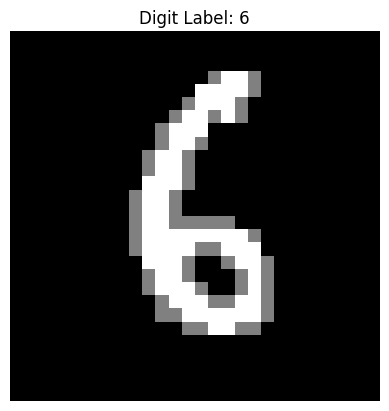

In [38]:
import matplotlib.pyplot as plt

imgs, labels = load_data("digit", "train")

# Pick random image
idx = random.randint(0, len(imgs) - 1)
img = imgs[idx].reshape(28, 28)

# Display image
plt.imshow(img, cmap="gray")
plt.title("Digit Label: " + str(labels[idx]))
plt.axis("off")
plt.show()

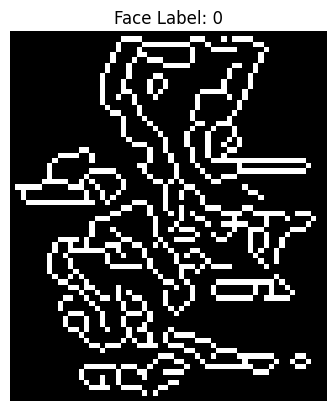

In [37]:
imgs, labels = load_data("face", "train")

idx = random.randint(0, len(imgs) - 1)

# Reshape and display
img = imgs[idx].reshape(70, 60)
plt.imshow(img, cmap="gray")
plt.title("Face Label: " + str(labels[idx]))
plt.axis("off")
plt.show()

Main

In [39]:


if __name__ == "__main__":

    perc = Perceptron()

    #perc.run_percep_on_data("train", "face")

    perc.run_percep_on_data("train", "digit")

    #perc.perceptron_digits("train")

    #perc.perceptron_faces("train")

digit, train
Running digit on perc_of_data= 0.1
------
 End of training on epoch 0, perc_of_data = 0.1
# of correct predictions 322
digit training accur = 0.644
------
Digit Validation accur = 590 / 1000, perc_accur = 0.59
------
 End of training on epoch 1, perc_of_data = 0.1
# of correct predictions 415
digit training accur = 0.83
------
Digit Validation accur = 725 / 1000, perc_accur = 0.725
------
 End of training on epoch 2, perc_of_data = 0.1
# of correct predictions 443
digit training accur = 0.886
------
Digit Validation accur = 743 / 1000, perc_accur = 0.743
------
 End of training on epoch 3, perc_of_data = 0.1
# of correct predictions 457
digit training accur = 0.914
------
Digit Validation accur = 738 / 1000, perc_accur = 0.738
------
 End of training on epoch 4, perc_of_data = 0.1
# of correct predictions 477
digit training accur = 0.954
------
Digit Validation accur = 777 / 1000, perc_accur = 0.777
------
 End of training on epoch 5, perc_of_data = 0.1
# of correct predic